# Running fastFMM directly in a IRkernel

In [3]:
require('fastFMM')

In [4]:
dat = read.csv("binary.csv") # read in data
head(as.matrix(round(dat[,1:10], 3)))

id,session,trial,cs,photometry.1,photometry.2,photometry.3,photometry.4,photometry.5,photometry.6
3,1,1,0,-0.810,-0.626,-0.484,-0.414,-0.336,-0.335
3,1,2,0,-0.037,-0.136,0.005,-0.022,0.029,0.251
3,1,3,0,-0.241,-0.058,0.037,-0.075,-0.242,-0.276
3,1,4,0,0.058,0.032,-0.041,0.080,0.062,-0.047
3,1,5,0,-0.134,0.024,0.017,-0.128,-0.108,-0.086
3,1,6,0,-0.547,-0.547,-0.444,-0.380,-0.309,-0.329


In [5]:
mod = fui(photometry ~ cs + (cs | id), data = dat, parallel = TRUE) # fit random slope model


Number of cores used for parallelization: 21



[1] "Step 1: Fit Massively Univariate Mixed Models"
[1] "Step 2: Smoothing"
[1] "Step 3: Inference (Analytic)"
[1] "Step 3.1: Preparation"
[1] "Step 3.1.1: Preparation B"
[1] "Step 3.1.1: Method of Moments Covariance Estimator"
[1] "Step 3.1.2: Smooth G"
[1] "Step 3.2: First step"
[1] "Step 3.2.1: First step"
[1] "Step 3.3: Second step"


Complete!
 - Use plot_fui() function to plot estimates.
 - For more information, run the command:  ?plot_fui



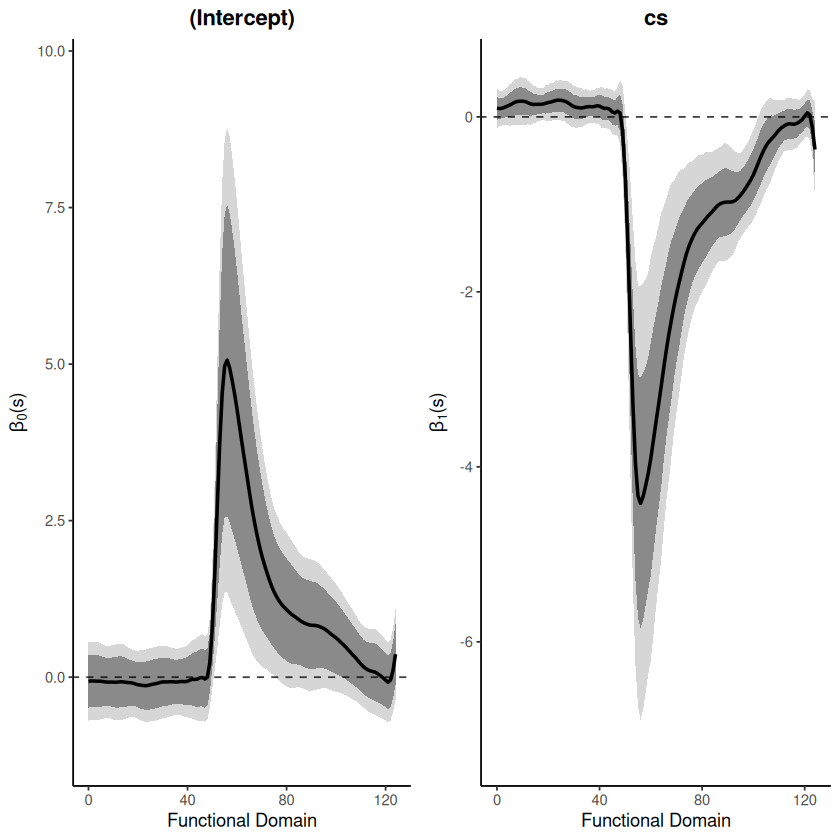

In [10]:
model_results = plot_fui(mod,  return = TRUE)

In [13]:
type(model_results)

ERROR: Error in type(model_results): could not find function "type"


In [15]:
library(ncdf4)

In [16]:
nc <- nc_open("sresa1b_ncar_ccsm3-example.nc")

In [25]:
pr <- nc$var[['pr']]

# use tidync

In [27]:
ice_file <- system.file("extdata", "ifremer", "20171002.nc", package = "tidync", mustWork = TRUE)

In [40]:
library(tidync)
nc <-tidync(ice_file)

In [41]:
nc


Data Source (1): 20171002.nc ...

Grids (2) <dimension family> : <associated variables> 

[1]   D0,D1,D2 : concentration, quality_flag    **ACTIVE GRID** ( 419648  values per variable)
[2]   D2       : time

Dimensions 3 (all active): 
  
  dim   name  length     min     max start count    dmin    dmax unlim coord_dim 
  <chr> <chr>  <dbl>   <dbl>   <dbl> <int> <int>   <dbl>   <dbl> <lgl> <lgl>     
1 D0    ni       632       1     632     1   632       1     632 FALSE FALSE     
2 D1    nj       664       1     664     1   664       1     664 FALSE FALSE     
3 D2    time       1 1032204 1032204     1     1 1032204 1032204 FALSE TRUE      

In [31]:
hf <- concentration %>% 
  hyper_filter(ni = index > 150, 
               nj = dplyr::between(index, 30, 100))

In [33]:
hf %>% hyper_array()

Class: tidync_data (list of tidync data arrays)
Variables (2): 'concentration', 'quality_flag'
Dimension (2): ni,nj,time (482, 71)
Source: /home/MRC.OX.AC.UK/ndcn1330/R/x86_64-pc-linux-gnu-library/4.5/tidync/extdata/ifremer/20171002.nc

In [44]:
df <- nc %>%
  hyper_tibble(select_var = c("concentration"))

In [45]:
df

concentration,ni,nj
<int>,<chr>,<chr>
0,291,5
0,292,5
0,293,5
0,294,5
0,295,5
0,296,5
0,297,5
0,298,5
0,299,5
